# **GRIP TASK #1 TOPIC-Predict the percentage of an student based on the no. of study hours.**

In [32]:
#libraries needed
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
%matplotlib inline

In [33]:
#The Data set needed
url = "http://bit.ly/w-data"
sp = pd.read_csv(url)
print("Data was Imported Successfully")

Data was Imported Successfully


In [35]:
#Now check the headers of the data and print some values
sp.head(24)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [36]:
df.describe()

,Actual,Predicted
count,5.000000,5.000000
mean,41.600000,42.651852
std,22.255336,24.407192
min,20.000000,16.884145
25%,27.000000,26.794801
50%,30.000000,33.732261
75%,62.000000,60.491033
max,69.000000,75.357018


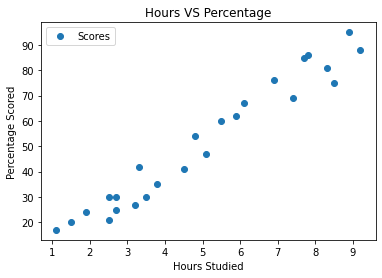

In [39]:

#Data visualization - Plotting Hours vs the percentage scored 

sp.plot(x='Hours', y='Scores',style='o')
plt.title('Hours VS Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

In [40]:
df.corr()

,Actual,Predicted
Actual,1.000000,0.980684
Predicted,0.980684,1.000000


In [10]:
#Data Preparation - Dividing data into Attributes and Values

X = sp.iloc[:,:-1].values
y = sp.iloc[:, 1].values

#Splitting the data between Training set and Validation set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Defining and training the algorithm

regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training Completed Everything alright!!")

Training Completed Everything alright!!


In [15]:
#Now Identifying the intercept and slope of the best fit line

print(regressor.intercept_)
print(regressor.coef_)

2.018160041434662
[9.91065648]


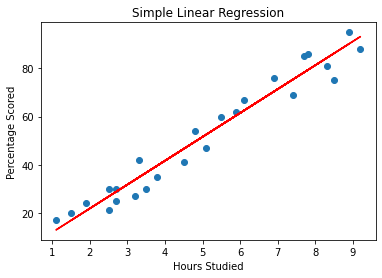

Everything working alright , regression line drawn successfully.


In [13]:
#Plotting the regression line between percentage scored and Hours Studied 

line = regressor.coef_*X + regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line, 'r-')
plt.title('Simple Linear Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()
print("Everything working alright , regression line drawn successfully.")

In [18]:
#Predictions

print(X_test) #Test input - Hours studied
y_pred = regressor.predict(X_test) #Predicting the output for test input

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [24]:
#Comparison between Actual and the Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## **Now the question which is asked What will be predicted score if a student studies for 9.25 hrs/ day?**

In [28]:
#My prediction of the answer
hours = np.array([9.25])#putting the value of 9.25 from the question
own_pred = regressor.predict(hours.reshape(1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = [9.25]
Predicted Score = [93.69173249]


### **Checking accuracy of our Model**

In [29]:
print("Train : ",regressor.score(X_train,y_train)*100)
print("Test : ",regressor.score(X_test,y_test)*100)

Train :  95.15510725211553
Test :  94.54906892105353


## **Finding mean absolute error, r^2 score error and Mean Squared Error**

In [30]:
#Evaluation of the model 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


## **Mean absolute error: 4.183859899002982 which is quite accurate model for predicting the result**